# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Read Data

In [2]:
directory = r'/home/mohamedelawakey/Desktop/Programming Books Recommendation System /ml/data/filtered/v1/tech_books_filtered.csv'
data = pd.read_csv(directory)

data.head()

/tmp/ipykernel_35655/2451535982.py:2: DtypeWarning: Columns (0: Authors, 1: ISBN, 2: Publisher, 3: RatingDist5, 4: RatingDist4, 5: RatingDist3, 6: RatingDist2, 7: RatingDist1, 8: RatingDistTotal, 9: Language, 10: Description) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(directory)


,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist1,RatingDistTotal,CountsOfReview,Language,PagesNumber,Description,pagesNumber,Count of text reviews,ID,tech_score
0,4184583.0,Between Therapists: The Processing of Transfer...,Arthur Robbins,1853028320,5.0,1999.0,11.0,1.0,Jessica Kingsley Publishers,5:3,...,1:0,total:3,0.0,NaN,240.0,Arthur Robbins demonstrates how important coun...,NaN,NaN,NaN,1
1,1800000.0,Last Word: Media Coverage of the Supreme Court...,Florian Sauvageau,0774812435,5.0,2005.0,12.0,6.0,University of British Columbia Press,5:1,...,1:0,total:1,0.0,NaN,272.0,Media coverage of the Supreme Court of Canada ...,NaN,NaN,NaN,4
2,2999469.0,Autumn Wisdom: A Book of Readings,Richard L. Morgan,1556354843,5.0,2007.0,6.0,8.0,Wipf & Stock Publishers,5:1,...,1:0,total:1,0.0,NaN,191.0,"""""Compelling . . . a rare find . . . a very sp...",NaN,NaN,NaN,3
3,734351.0,James Denney (1856-1917),James M. Gordon,1597527831,5.0,2006.0,1.0,6.0,Wipf & Stock Publishers,5:1,...,1:0,total:1,0.0,NaN,NaN,"James Denney is now best known, though in incr...",286.0,0.0,NaN,3
4,2999715.0,Cautious Rebel: A Biography of Susan Clay Smitzky,Lindsey Apple,0873385799,5.0,1997.0,6.0,15.0,Kent State University Press,5:1,...,1:0,total:1,0.0,NaN,322.0,"""Willa Cather wrote that 'the history of every...",NaN,NaN,NaN,2


# Explore Data & Clean

In [3]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 433129 entries, 0 to 433128
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id                     424911 non-null  float64
 1   Name                   433129 non-null  str    
 2   Authors                424911 non-null  str    
 3   ISBN                   423760 non-null  str    
 4   Rating                 424911 non-null  float64
 5   PublishYear            424911 non-null  float64
 6   PublishMonth           424911 non-null  float64
 7   PublishDay             424911 non-null  float64
 8   Publisher              422149 non-null  str    
 9   RatingDist5            424911 non-null  str    
 10  RatingDist4            424911 non-null  str    
 11  RatingDist3            424911 non-null  str    
 12  RatingDist2            424911 non-null  str    
 13  RatingDist1            424911 non-null  str    
 14  RatingDistTotal        424911 non-null  str    

In [4]:
# know the columns of the data

for col in data.columns:
    print(f"{col}: {data[col].dtype}")

Id: float64
Name: str
Authors: str
ISBN: str
Rating: float64
PublishYear: float64
PublishMonth: float64
PublishDay: float64
Publisher: str
RatingDist5: str
RatingDist4: str
RatingDist3: str
RatingDist2: str
RatingDist1: str
RatingDistTotal: str
CountsOfReview: float64
Language: str
PagesNumber: float64
Description: str
pagesNumber: float64
Count of text reviews: float64
ID: float64
tech_score: int64


In [5]:
# know the columns of numerical values (float64, int64)

float64_columns = [col for col in data.columns if data[col].dtype == 'float64']
int64_columns = [col for col in data.columns if data[col].dtype == 'int64']

print(int64_columns)
print(float64_columns)

['tech_score']
['Id', 'Rating', 'PublishYear', 'PublishMonth', 'PublishDay', 'CountsOfReview', 'PagesNumber', 'pagesNumber', 'Count of text reviews', 'ID']


In [6]:
# convert data from type to another to reduce memory

data[int64_columns] = data[int64_columns].astype('int8')
data['ISBN'] = data['ISBN'].astype('str')
data[float64_columns] = data[float64_columns].astype('float16')
data['Rating'] = data['Rating'].astype('float64')

/home/mohamedelawakey/Desktop/Programming Books Recommendation System /venv/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:136: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=copy)
/home/mohamedelawakey/Desktop/Programming Books Recommendation System /venv/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:136: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=copy)
/home/mohamedelawakey/Desktop/Programming Books Recommendation System /venv/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:136: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=copy)
/home/mohamedelawakey/Desktop/Programming Books Recommendation System /venv/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:136: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=copy)


In [7]:
# heck the conversion is okay or no

data.info()

<class 'pandas.DataFrame'>
RangeIndex: 433129 entries, 0 to 433128
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id                     424911 non-null  float16
 1   Name                   433129 non-null  str    
 2   Authors                424911 non-null  str    
 3   ISBN                   423760 non-null  str    
 4   Rating                 424911 non-null  float64
 5   PublishYear            424911 non-null  float16
 6   PublishMonth           424911 non-null  float16
 7   PublishDay             424911 non-null  float16
 8   Publisher              422149 non-null  str    
 9   RatingDist5            424911 non-null  str    
 10  RatingDist4            424911 non-null  str    
 11  RatingDist3            424911 non-null  str    
 12  RatingDist2            424911 non-null  str    
 13  RatingDist1            424911 non-null  str    
 14  RatingDistTotal        424911 non-null  str    

In [8]:
# know the percentage of missing values in each column

(data.isnull().sum() / data.shape[0]) * 100

Id                        1.897356
Name                      0.000000
Authors                   1.897356
ISBN                      2.163097
Rating                    1.897356
PublishYear               1.897356
PublishMonth              1.897356
PublishDay                1.897356
Publisher                 2.535042
RatingDist5               1.897356
RatingDist4               1.897356
RatingDist3               1.897356
RatingDist2               1.897356
RatingDist1               1.897356
RatingDistTotal           1.897356
CountsOfReview            1.897356
Language                 87.696275
PagesNumber              39.263129
Description               8.300299
pagesNumber              62.634227
Count of text reviews    71.714201
ID                       98.102644
tech_score                0.000000
dtype: float64

### Data Repair

In [9]:
# combine between Pages Number columns in one column called Pages
data['Pages'] = data['PagesNumber'].combine_first(data['pagesNumber'])

# fill the missing values of the Description column with No description available
data['Description'] = data['Description'].fillna('No description available')

# drop any nan values in each columns that we determine
important_cols = ['Name', 'Authors', 'ISBN', 'Rating', 'PublishYear', 'Publisher', 'Pages']
data = data.dropna(subset=important_cols)

# drop columns with unless and have a lot of missing values
cols_to_drop = [
    'Language',
    'PagesNumber',
    'pagesNumber',
    'Count of text reviews',
    'ID'
]
data = data.drop(columns=cols_to_drop, errors='ignore')

# drop the  duplicates from columns
data = data.drop_duplicates(
    subset=['ISBN', 'Name', 'Authors', 'PublishYear', 'Publisher', 'Pages', 'Rating'],
    keep='first'
)

print("Shape after cleaning:", data.shape)
print("Missing values:\n", data.isnull().sum())
print("Duplicates left:", data.duplicated().sum())

Shape after cleaning: (421030, 19)
Missing values:
 Id                 0
Name               0
Authors            0
ISBN               0
Rating             0
PublishYear        0
PublishMonth       0
PublishDay         0
Publisher          0
RatingDist5        0
RatingDist4        0
RatingDist3        0
RatingDist2        0
RatingDist1        0
RatingDistTotal    0
CountsOfReview     0
Description        0
tech_score         0
Pages              0
dtype: int64
Duplicates left: 0


In [10]:
# check the percentage of the missing values in each column
(data.isnull().sum() / data.shape[0]) * 100

Id                 0.0
Name               0.0
Authors            0.0
ISBN               0.0
Rating             0.0
PublishYear        0.0
PublishMonth       0.0
PublishDay         0.0
Publisher          0.0
RatingDist5        0.0
RatingDist4        0.0
RatingDist3        0.0
RatingDist2        0.0
RatingDist1        0.0
RatingDistTotal    0.0
CountsOfReview     0.0
Description        0.0
tech_score         0.0
Pages              0.0
dtype: float64

# EDA

### Quick Overview After Cleaning

In [11]:
# shape of data after cleaning
data.shape

(421030, 19)

In [12]:
# check the percentage of the missing values in each column after cleaning
(data.isnull().sum() / len(data) * 100).round(2)

Id                 0.0
Name               0.0
Authors            0.0
ISBN               0.0
Rating             0.0
PublishYear        0.0
PublishMonth       0.0
PublishDay         0.0
Publisher          0.0
RatingDist5        0.0
RatingDist4        0.0
RatingDist3        0.0
RatingDist2        0.0
RatingDist1        0.0
RatingDistTotal    0.0
CountsOfReview     0.0
Description        0.0
tech_score         0.0
Pages              0.0
dtype: float64

In [13]:
# check is there any duplicates in the columns
data.duplicated().sum()

np.int64(0)

### possible outliers

In [14]:
# check if there any PublishYear is strange
data['PublishYear'][(data['PublishYear'] < 1900) | (data['PublishYear'] > 2025)].value_counts()

PublishYear
1899.0     15
200.0       3
2030.0      3
2100.0      2
1896.0      2
1889.0      2
1893.0      1
1824.0      1
1838.0      1
2035.0      1
20016.0     1
1898.0      1
1854.0      1
20096.0     1
1837.0      1
1192.0      1
20064.0     1
1851.0      1
1894.0      1
1881.0      1
Name: count, dtype: int64

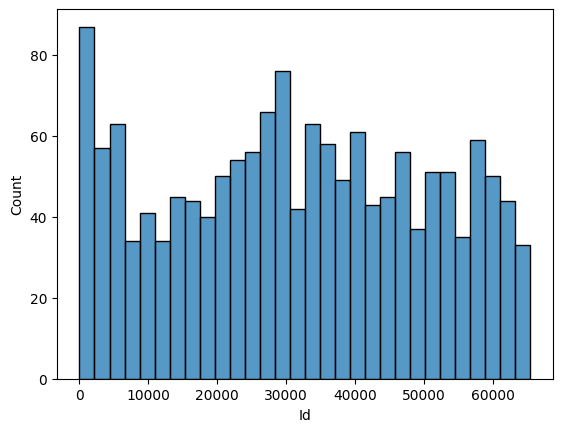

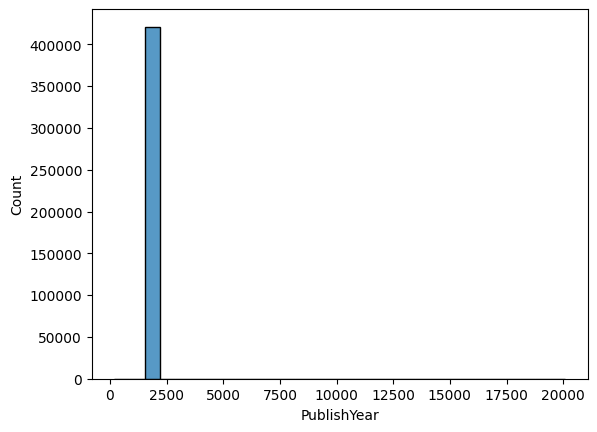

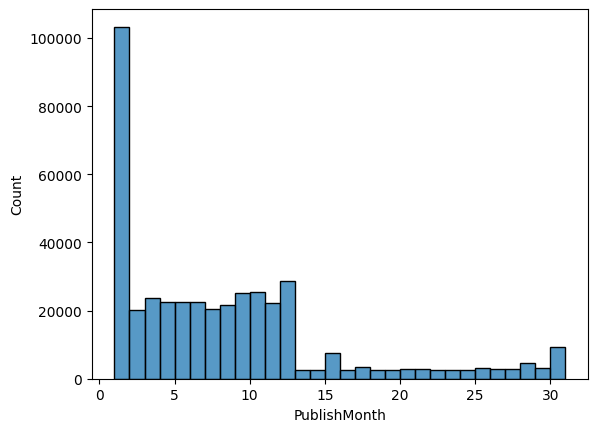

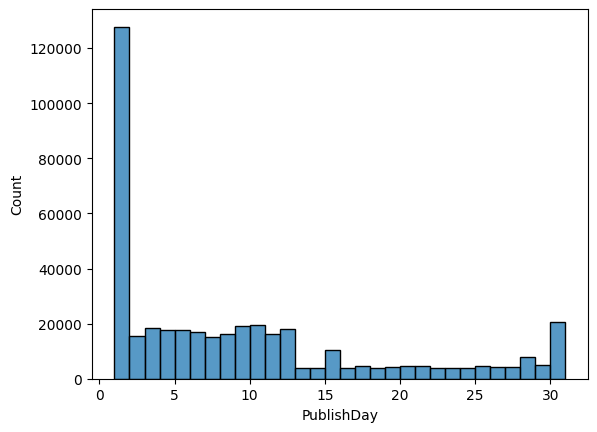

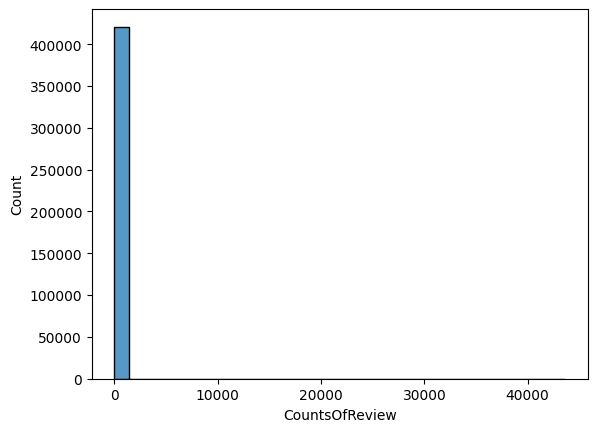

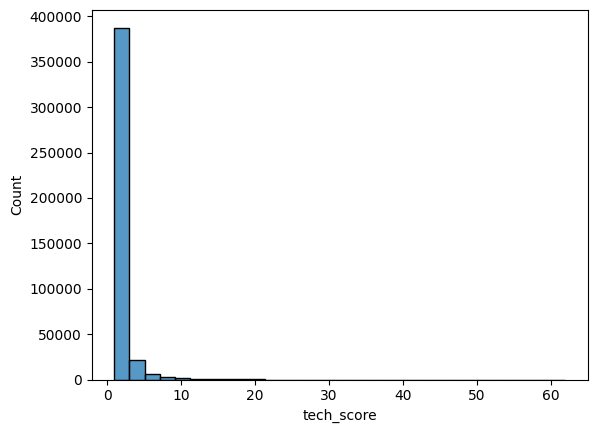

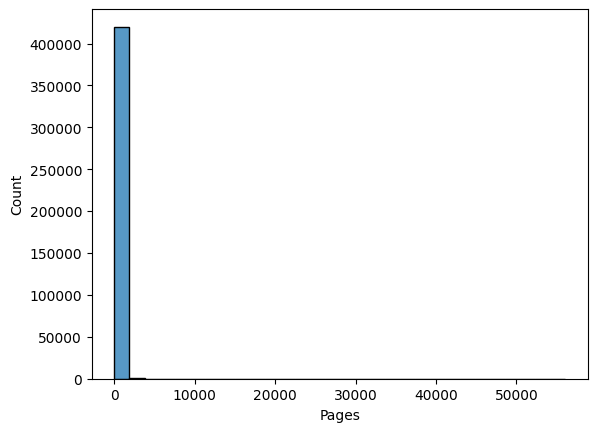

In [15]:
# histogram distributions

num_cols = [col for col in data.columns if data[col].dtype in ['float16', 'int8']]
for col in num_cols:
    sns.histplot(data=data, x=col, bins=30)
    plt.show()

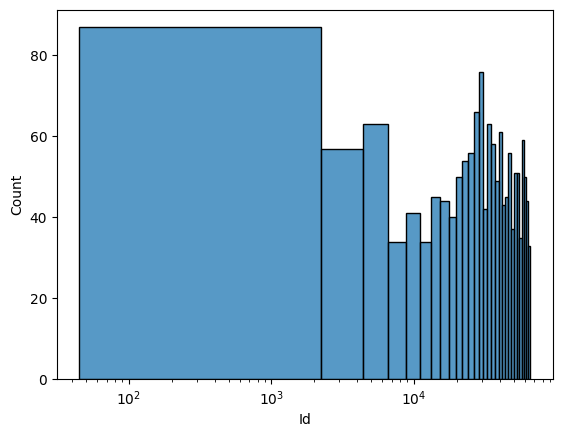

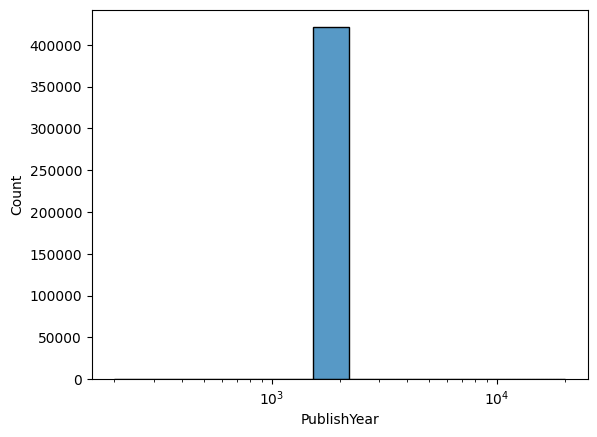

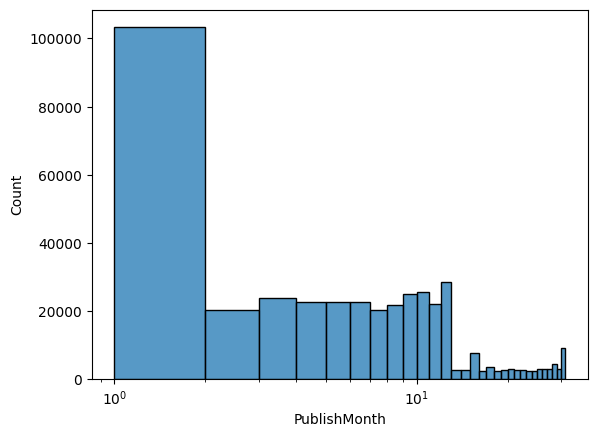

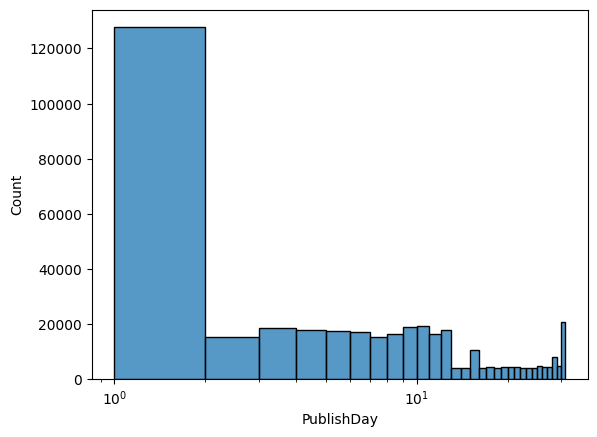

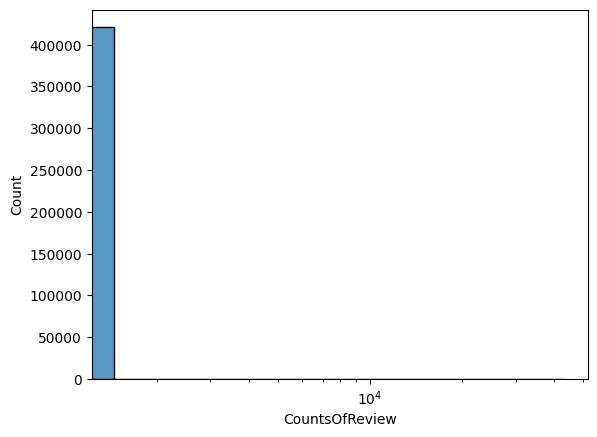

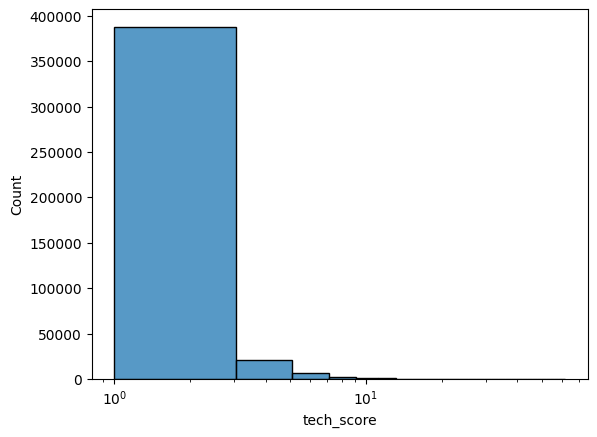

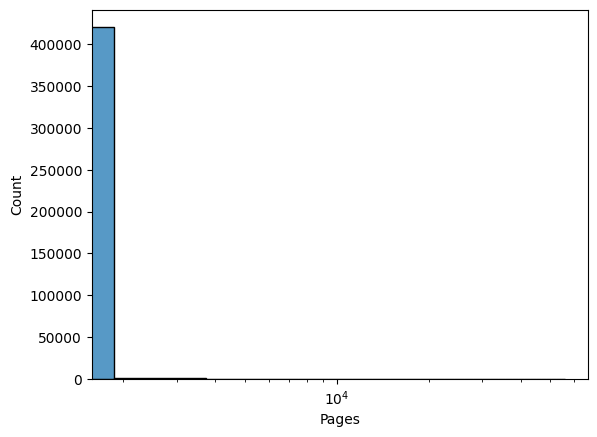

In [16]:
# histogram distributions with log

num_cols = [col for col in data.columns if data[col].dtype in ['float16', 'int8']]
for col in num_cols:
    sns.histplot(data=data, x=col, bins=30)
    plt.xscale('log')
    plt.show()
    

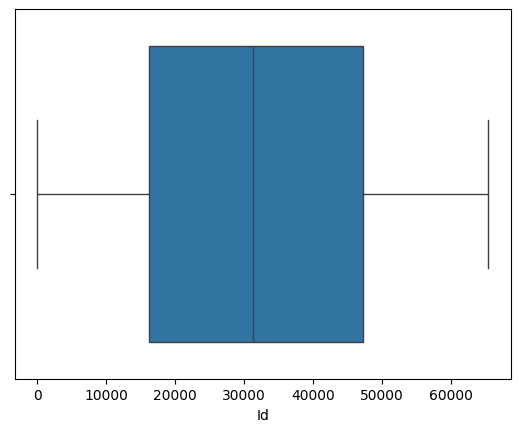

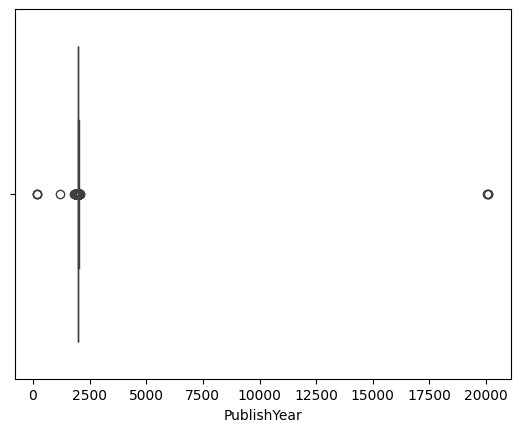

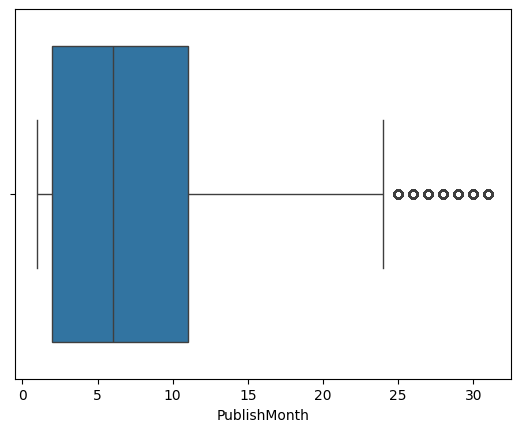

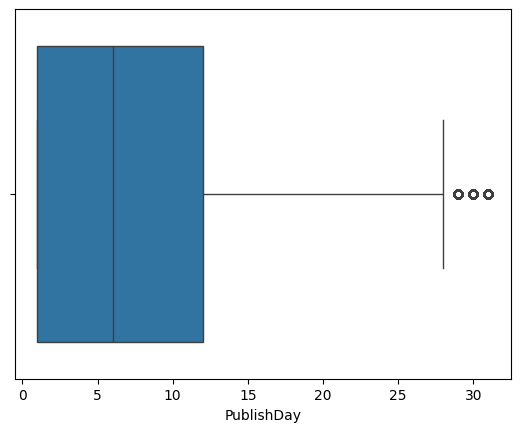

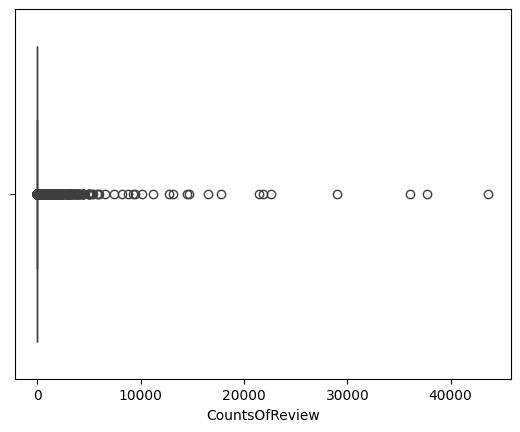

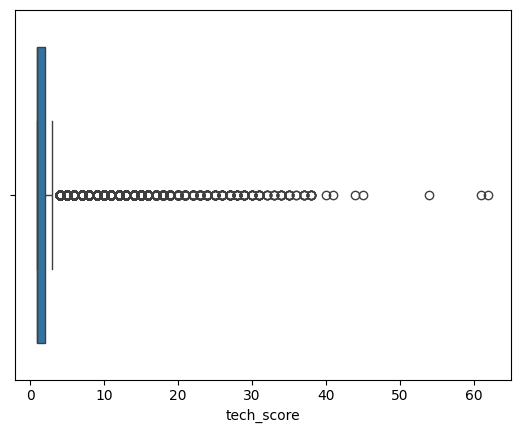

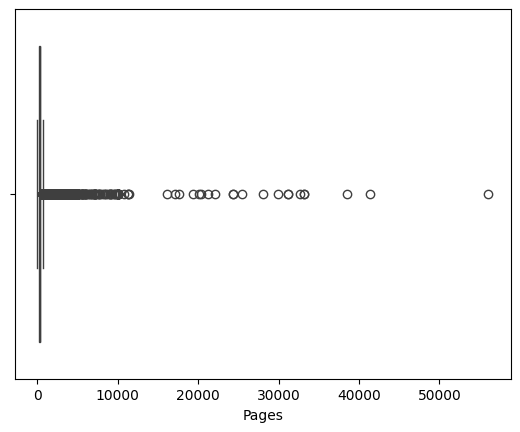

In [17]:
# boxplot distributions

num_cols = [col for col in data.columns if data[col].dtype in ['float16', 'int8']]
for col in num_cols:
    sns.boxplot(data=data, x=col)
    plt.show()

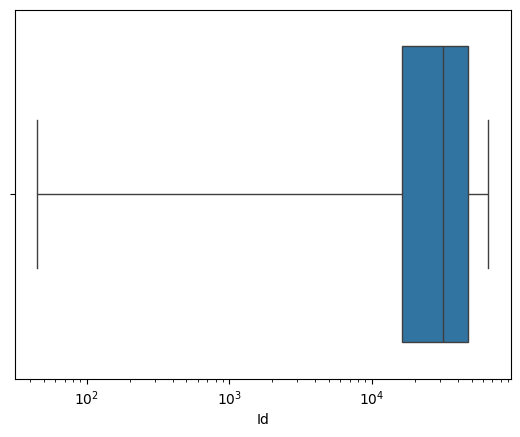

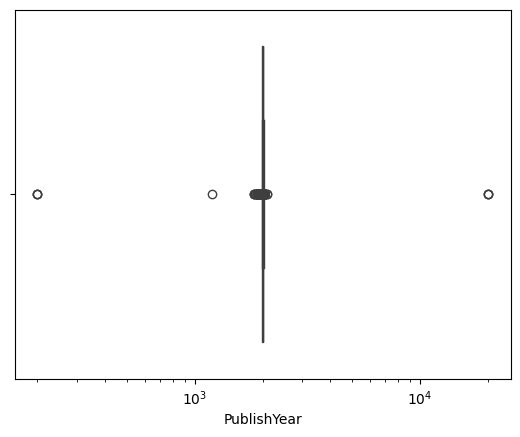

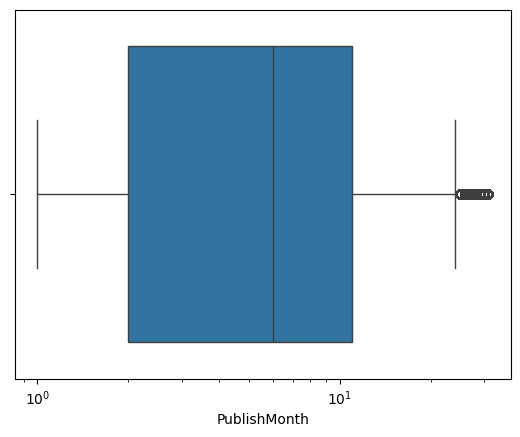

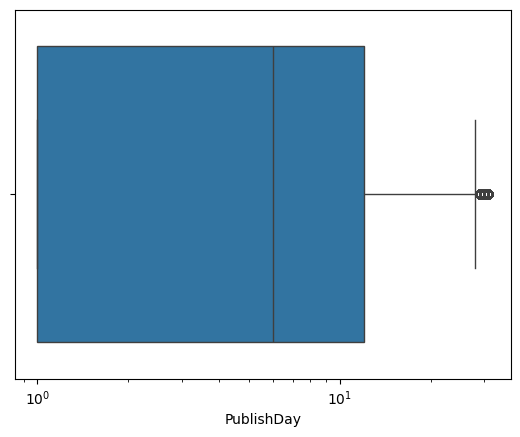

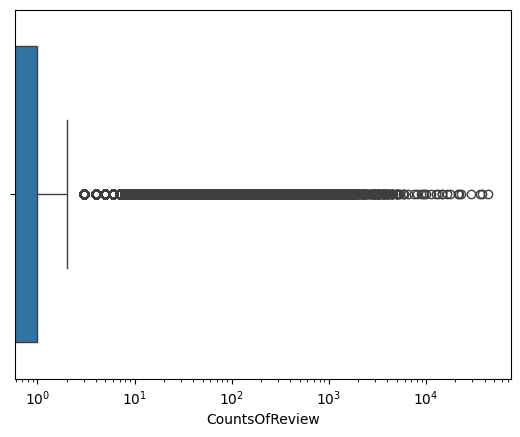

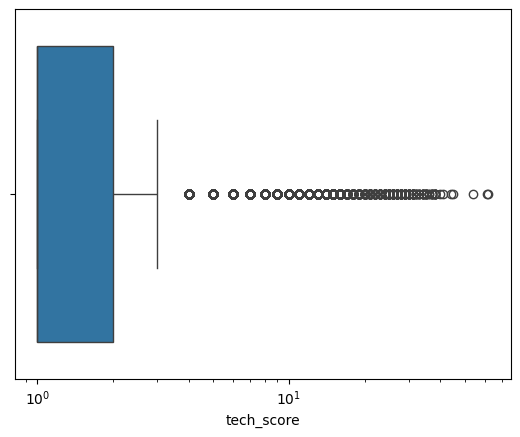

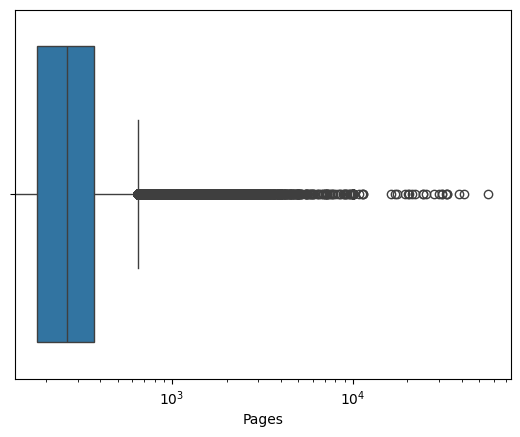

In [18]:
# boxplot distributions with log

num_cols = [col for col in data.columns if data[col].dtype in ['float16', 'int8']]
for col in num_cols:
    sns.boxplot(data=data, x=col)
    plt.xscale('log')
    plt.show()

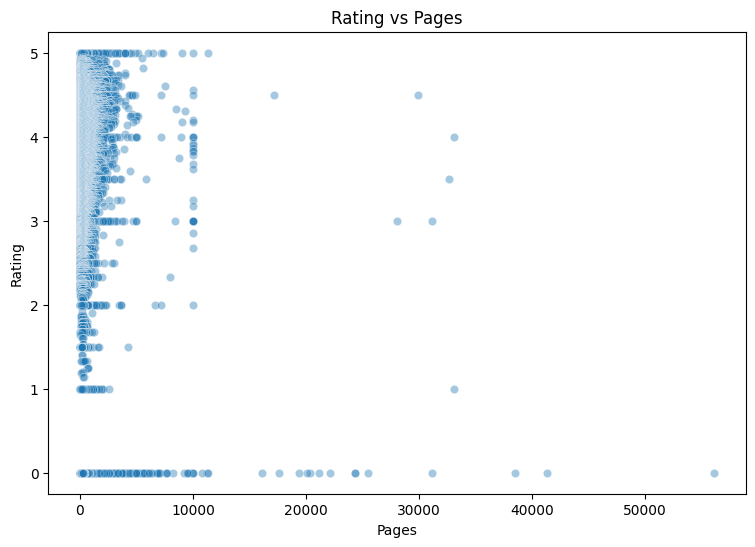

In [19]:
# scatterplot distributions 

x_col = 'Pages'
y_col = 'Rating'

plt.figure(figsize=(9, 6))
sns.scatterplot(data=data, x=x_col, y=y_col, alpha=0.4)
plt.title(f"{y_col} vs {x_col}")
plt.show()

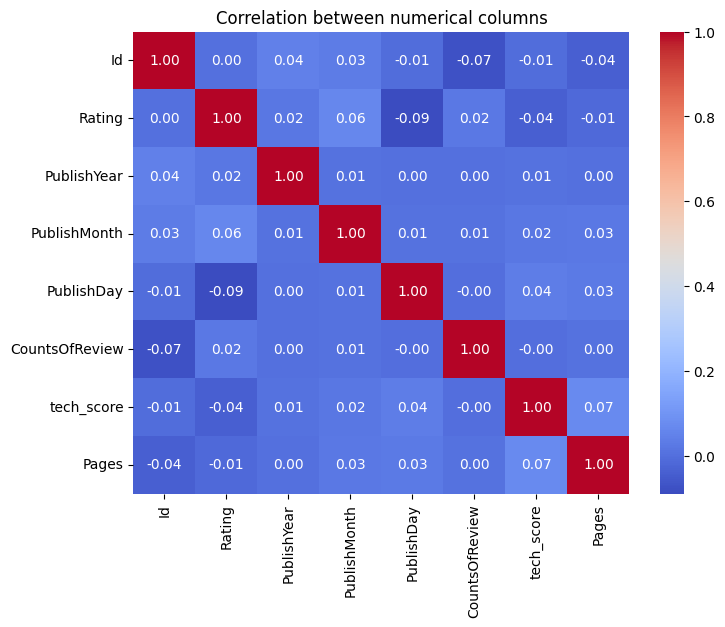

In [20]:
# heatmap distributions

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation between numerical columns")
plt.show()

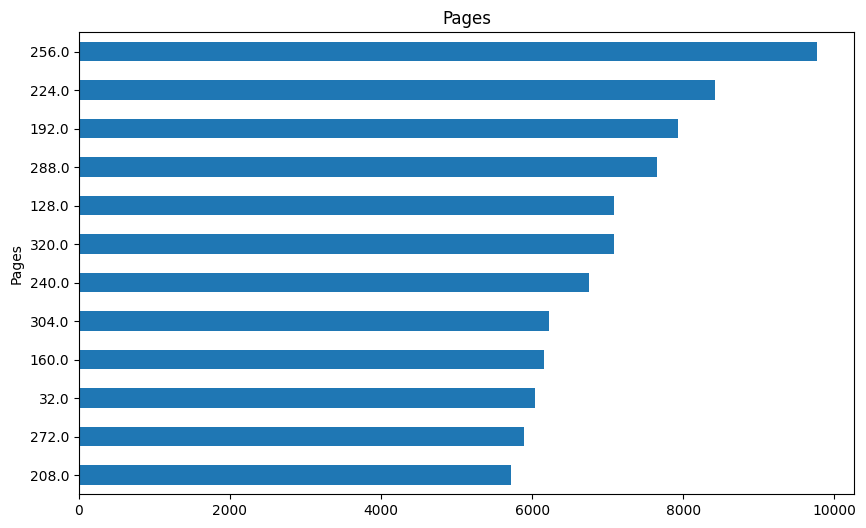

In [21]:
plt.figure(figsize=(10, 6))
data[col].value_counts().head(12).plot(kind='barh')
plt.title(f"{col}")
plt.gca().invert_yaxis()
plt.show()

In [22]:
data['PublishYear'].value_counts().head(15)

PublishYear
2007.0    37405
2005.0    29295
2006.0    29000
2008.0    27809
2004.0    26725
2003.0    25865
2002.0    23364
2001.0    21173
2000.0    20399
1999.0    18671
1998.0    18370
1997.0    16620
1996.0    14049
1995.0    12525
1994.0    10894
Name: count, dtype: int64

In [23]:
print((data['PublishYear'] > 2026).mean() * 100)

print(data['PublishYear'].between(1881, 2026).sum())

0.002137614896800703
421012


In [24]:
before = len(data)
data = data[data['Pages'] <= 2000].copy()
data = data[data['Pages'] >= 10].copy()
after = len(data)

data['Pages'].max()

np.float16(2e+03)

In [25]:
# data = data[data['tech_score'].between(2, 5, inclusive='both')].copy()
data = data.drop(columns=['PublishMonth', 'PublishDay'], errors='ignore')

In [26]:
print("Final number of rows:", len(data))
print("\nMissing values:")
print(data.isna().sum())

print("\nTop 5 values ​​in Pages:", data['Pages'].sort_values(ascending=False).head(5).tolist())
print("Low 5 values ​​in Pages:", data['Pages'].sort_values().head(5).tolist())

print("\nRating percentage > 0:", (data['Rating'] > 0).mean() * 100, "%")
print("Average Rating for reviewed books:", round(data[data['Rating'] > 0]['Rating'].mean(), 2))

Final number of rows: 415226

Missing values:
Id                 0
Name               0
Authors            0
ISBN               0
Rating             0
PublishYear        0
Publisher          0
RatingDist5        0
RatingDist4        0
RatingDist3        0
RatingDist2        0
RatingDist1        0
RatingDistTotal    0
CountsOfReview     0
Description        0
tech_score         0
Pages              0
dtype: int64

Top 5 values ​​in Pages: [2000.0, 2000.0, 2000.0, 2000.0, 2000.0]
Low 5 values ​​in Pages: [10.0, 10.0, 10.0, 10.0, 10.0]

Rating percentage > 0: 75.00493707041467 %
Average Rating for reviewed books: 3.82


In [27]:
print("Final number of rows:", len(data))
print("Minimum and maximum Pages:", data['Pages'].min(), "→", data['Pages'].max())
print("Rating percentage > 0:", (data['Rating'] > 0).mean() * 100, "%")
print("Average Rating (non-zero):", data[data['Rating'] > 0]['Rating'].mean().round(2))
print("Most 5 years of publication:", data['PublishYear'].value_counts().head(5).to_dict())

Final number of rows: 415226
Minimum and maximum Pages: 10.0 → 2e+03
Rating percentage > 0: 75.00493707041467 %
Average Rating (non-zero): 3.82
Most 5 years of publication: {2007.0: 36761, 2005.0: 28832, 2006.0: 28462, 2008.0: 27315, 2004.0: 26327}


In [28]:
np.isinf(data['Rating']).any()

np.False_

In [29]:
data['Rating'].isna().any()

np.False_

In [30]:
print("Final number of rows:", len(data))
print("\nMissing values:")
print(data.isna().sum())

print("\nTop 5 values ​​in Pages:", data['Pages'].sort_values(ascending=False).head(5).tolist())
print("Low 5 values ​​in Pages:", data['Pages'].sort_values().head(5).tolist())

print("\nRating percentage > 0:", (data['Rating'] > 0).mean() * 100, "%")
print("Average Rating for reviewed books:", round(data[data['Rating'] > 0]['Rating'].mean(), 2))

Final number of rows: 415226

Missing values:
Id                 0
Name               0
Authors            0
ISBN               0
Rating             0
PublishYear        0
Publisher          0
RatingDist5        0
RatingDist4        0
RatingDist3        0
RatingDist2        0
RatingDist1        0
RatingDistTotal    0
CountsOfReview     0
Description        0
tech_score         0
Pages              0
dtype: int64

Top 5 values ​​in Pages: [2000.0, 2000.0, 2000.0, 2000.0, 2000.0]
Low 5 values ​​in Pages: [10.0, 10.0, 10.0, 10.0, 10.0]

Rating percentage > 0: 75.00493707041467 %
Average Rating for reviewed books: 3.82


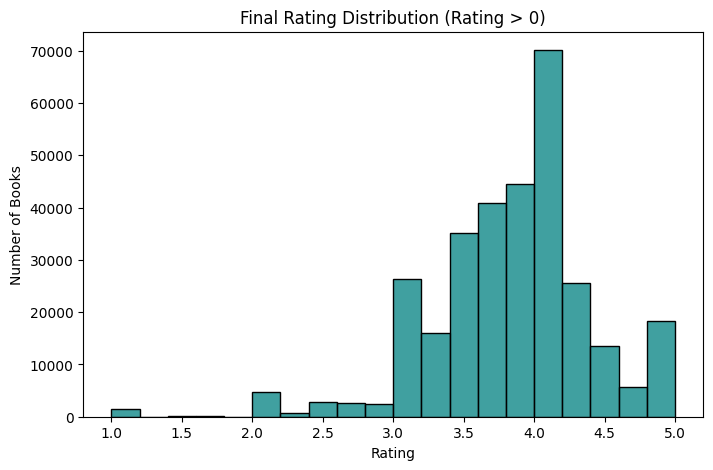

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(data[data['Rating'] > 0]['Rating'], bins=20, color='teal')
plt.title("Final Rating Distribution (Rating > 0)")
plt.xlabel("Rating")
plt.ylabel("Number of Books")
plt.show()

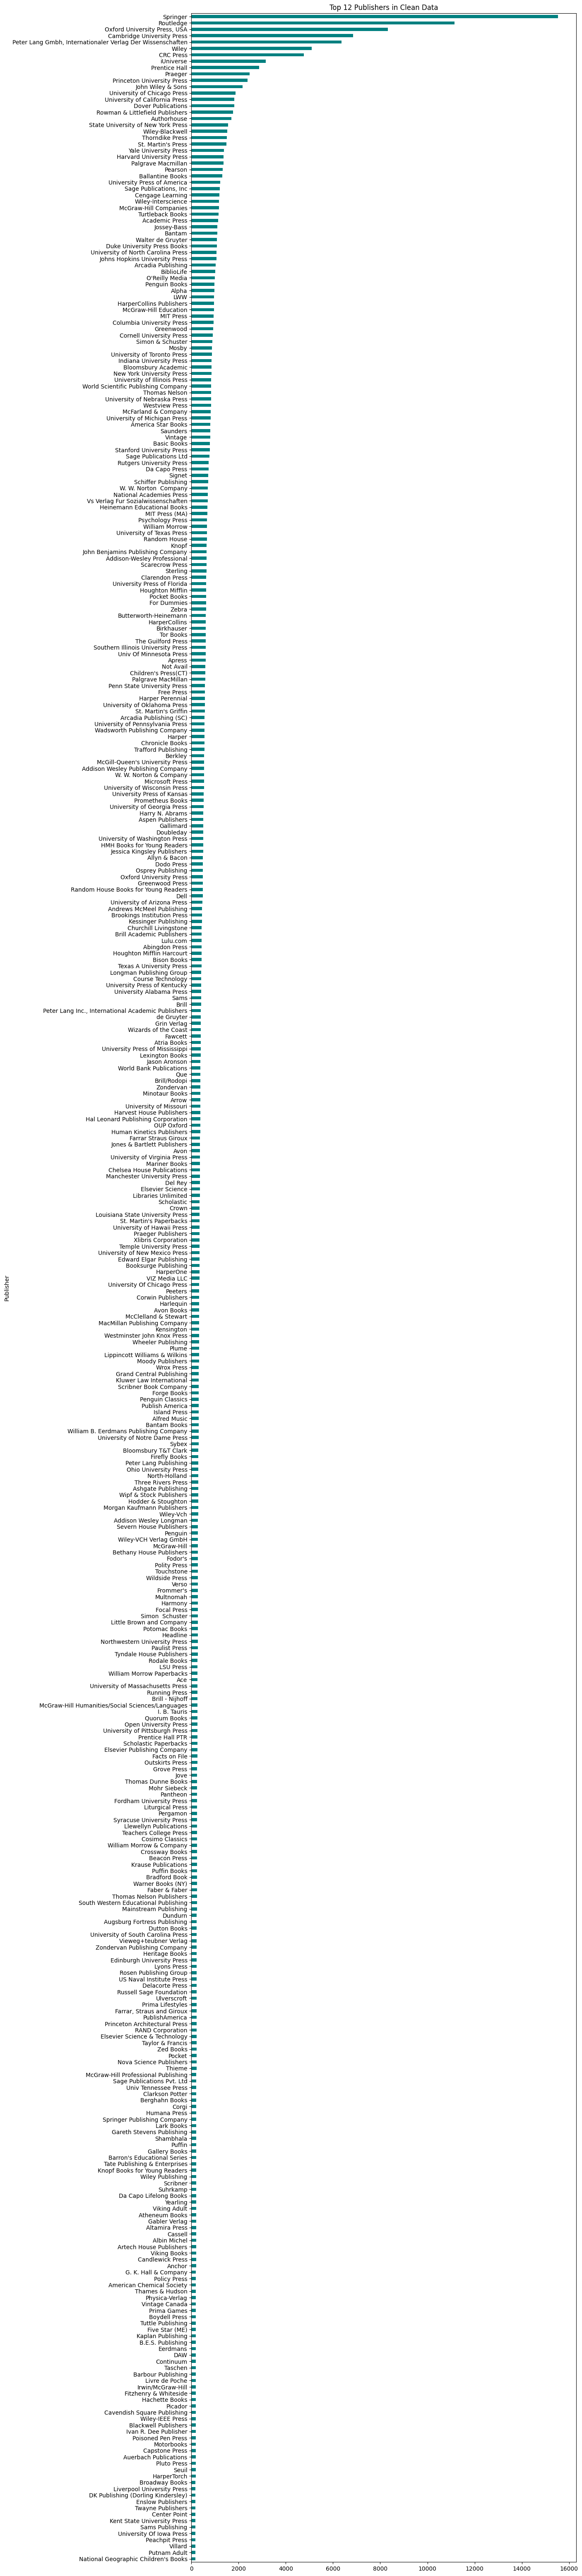

In [32]:
plt.figure(figsize=(12,80))
data['Publisher'].value_counts().head(400).plot(kind='barh', color='teal')
plt.title("Top 12 Publishers in Clean Data")
plt.gca().invert_yaxis()
plt.show()

### Final Check

In [33]:
# Number of Rows and Missing Values
print("Final number of rows:", len(data))
print("\nMissing values in each column:")
print(data.isna().sum())

# Pages Range (Must be realistic)
print("\nPages → Minimum value:", data['Pages'].min())
print("Pages → Maximum value:", data['Pages'].max())
print("Number of books with Pages = 0 or < 10:", (data['Pages'] < 10).sum())

# Rating Status (Most important)
rated = data[data['Rating'] > 0]
print("\nPercentage of books with a true rating (> 0):",
(data['Rating'] > 0).mean() * 100, "%")
print("Average rating of rated books:", round(rated['Rating'].mean(), 2))
print("Highest rating:", data['Rating'].max())
print("Lowest non-zero rating:", data[data['Rating'] > 0]['Rating'].min())

# Top 10 Publishers (to confirm popularity is back)
print("\nTop 10 Publishers after filter removal:")
print(data['Publisher'].value_counts().head(10))

# Top 5 Years of Publishing (must be logical)
print("\nTop 5 Years of Publishing:")
print(data['PublishYear'].value_counts().head(5))

Final number of rows: 415226

Missing values in each column:
Id                 0
Name               0
Authors            0
ISBN               0
Rating             0
PublishYear        0
Publisher          0
RatingDist5        0
RatingDist4        0
RatingDist3        0
RatingDist2        0
RatingDist1        0
RatingDistTotal    0
CountsOfReview     0
Description        0
tech_score         0
Pages              0
dtype: int64

Pages → Minimum value: 10.0
Pages → Maximum value: 2e+03
Number of books with Pages = 0 or < 10: 0

Percentage of books with a true rating (> 0): 75.00493707041467 %
Average rating of rated books: 3.82
Highest rating: 5.0
Lowest non-zero rating: 1.0

Top 10 Publishers after filter removal:
Publisher
Springer                                                      15536
Routledge                                                     11142
Oxford University Press, USA                                   8332
Cambridge University Press                                     

In [34]:
data.shape

(415226, 17)

In [35]:
data.to_csv("/home/mohamedelawakey/Desktop/Programming Books Recommendation System /ml/data/cleaned/v1/tech_programming_books_final_cleaned.csv", index=False, encoding='utf-8')
print("The final data has been saved as tech_programming_books_final_cleaned.csv")

The final data has been saved as tech_programming_books_final_cleaned.csv
